#### LinkedIn: [Ailton Amorim de Menezes](https://www.linkedin.com/in/ailton-amorim-de-menezes-1228a0282/)
#### Kaggle: [Ailton Amorim de Menezes](https://www.kaggle.com/aiamenez/)
#### GitHub: [Ailton Amorim de Menezes](https://github.com/AiltonMenezes1980/)

In [1]:
from platform import python_version
print(f"Versão do Python Usada Neste Notebook: {python_version()}")

Versão do Python Usada Neste Notebook: 3.11.4


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
import sqlite3
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
%reload_ext watermark
%watermark -a "Ailton Amorim de Menezes" --iversions

Author: Ailton Amorim de Menezes

pandas    : 2.0.3
numpy     : 1.25.1
matplotlib: 3.7.2
seaborn   : 0.12.2
sqlite3   : 2.6.0



In [4]:
cnn = sqlite3.connect("database/prouni.db")

In [5]:
query = "SELECT * FROM prouni"
prouni = pd.read_sql(query, cnn)

In [6]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,Nordeste,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,Nordeste,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Psicologia,Vespertino,F,Parda,04/11/1998,N,Nordeste,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Serviço Social,Noturno,F,Parda,29/09/1999,N,Nordeste,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,BOLSA INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,Sul,RS,SAO FRANCISCO DE PAULA


In [7]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648894 entries, 0 to 648893
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   index                           648894 non-null  int64 
 1   ANO_CONCESSAO                   648894 non-null  object
 2   NOME_IES                        648894 non-null  object
 3   TIPO_BOLSA                      648894 non-null  object
 4   MODALIDADE_ENSINO               648894 non-null  object
 5   NOME_CURSO                      648894 non-null  object
 6   NOME_TURNO_CURSO                648894 non-null  object
 7   SEXO_BENEFICIARIO               648894 non-null  object
 8   RACA_BENEFICIARIO               648894 non-null  object
 9   DATA_NASCIMENTO                 648894 non-null  object
 10  BENEFICIARIO_DEFICIENTE_FISICO  648894 non-null  object
 11  REGIAO_BENEFICIARIO             648894 non-null  object
 12  UF_BENEFICIARIO               

In [8]:
prouni.isna()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648889,False,False,False,False,False,False,False,False,False,False,False,False,False,False
648890,False,False,False,False,False,False,False,False,False,False,False,False,False,False
648891,False,False,False,False,False,False,False,False,False,False,False,False,False,False
648892,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,Nordeste,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,Nordeste,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Psicologia,Vespertino,F,Parda,04/11/1998,N,Nordeste,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Serviço Social,Noturno,F,Parda,29/09/1999,N,Nordeste,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,BOLSA INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,Sul,RS,SAO FRANCISCO DE PAULA


In [10]:
unique_values = prouni['ANO_CONCESSAO'].unique()
print(unique_values)

['2018.0' '2019.0' 'Outro' '2020.0']


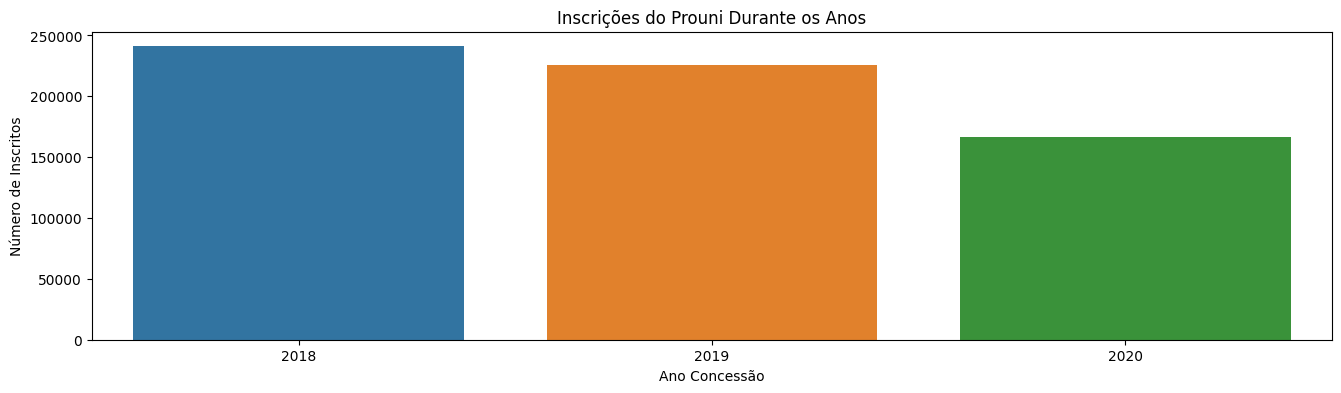

In [11]:
df_prouni_filtrado = prouni[prouni['ANO_CONCESSAO'] != 'Outro']
df_prouni_filtrado['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)

plt.figure(figsize = (16, 4))
sns.countplot(x='ANO_CONCESSAO', data=df_prouni_filtrado)
plt.title("Inscrições do Prouni Durante os Anos")
plt.xlabel("Ano Concessão")
plt.ylabel("Número de Inscritos")
plt.show()

In [12]:
print(prouni['RACA_BENEFICIARIO'].value_counts())

RACA_BENEFICIARIO
Parda            295920
Branca           244113
Preta             81848
Outro             15477
Amarela           10882
Indígena            401
Ind¡gena            153
Não Informada       100
Name: count, dtype: int64


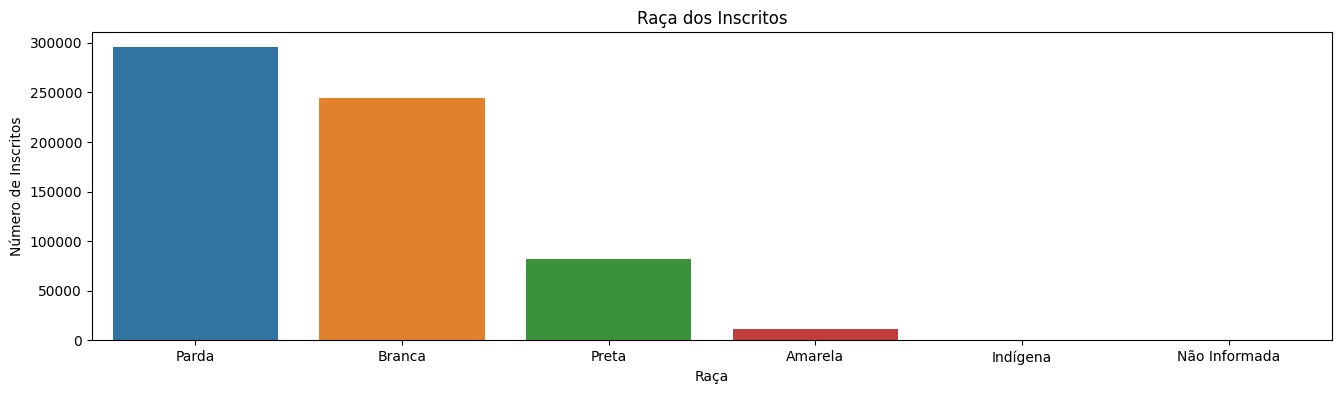

In [13]:
prouni['RACA_BENEFICIARIO'] = prouni['RACA_BENEFICIARIO'].replace('Ind¡gena', 'Indígena')
df_prouni_filtrado = prouni[prouni['RACA_BENEFICIARIO'] != 'Outro']

plt.figure(figsize = (16, 4))
sns.countplot(x = "RACA_BENEFICIARIO", data = df_prouni_filtrado)
plt.title("Raça dos Inscritos")
plt.xlabel("Raça")
plt.ylabel("Número de Inscritos")
plt.show()

In [14]:
contingency_table = pd.crosstab(prouni['ANO_CONCESSAO'], prouni['RACA_BENEFICIARIO'])

print(contingency_table)

RACA_BENEFICIARIO  Amarela  Branca  Indígena  Não Informada  Outro   Parda  \
ANO_CONCESSAO                                                                
2018.0                4165   93254       204             22      0  112148   
2019.0                3817   86375       197              5      0  105705   
2020.0                2900   64484       153             73      0   78067   
Outro                    0       0         0              0  15477       0   

RACA_BENEFICIARIO  Preta  
ANO_CONCESSAO             
2018.0             31239  
2019.0             29456  
2020.0             21153  
Outro                  0  


In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'valor-p: {p}')

valor-p: 0.0


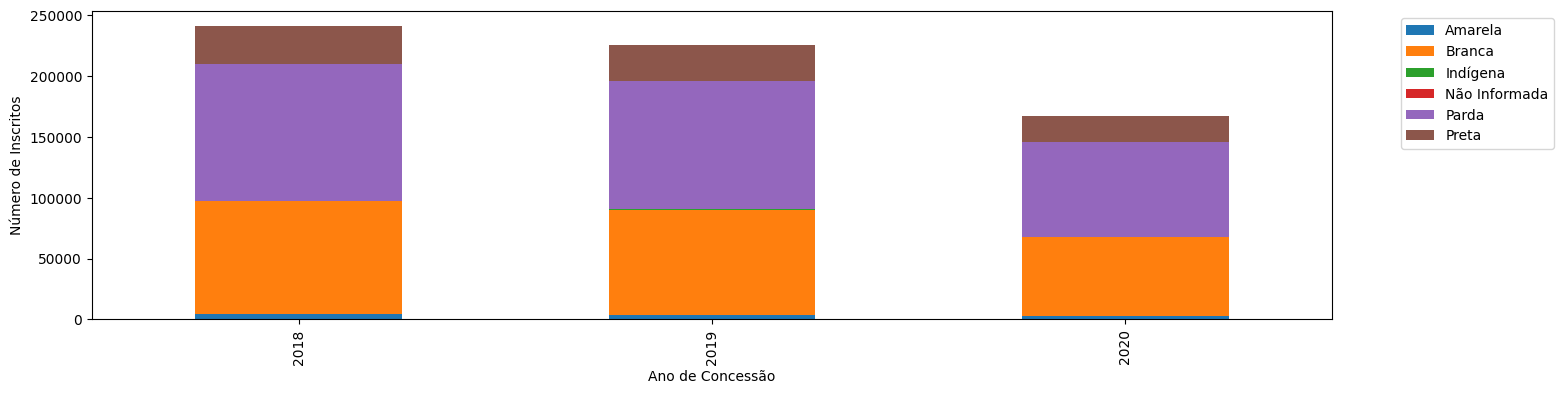

In [16]:
df_prouni_filtrado = prouni.loc[prouni['ANO_CONCESSAO'] != 'Outro']

df_prouni_filtrado['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)

contingency_table = pd.crosstab(df_prouni_filtrado['ANO_CONCESSAO'], df_prouni_filtrado['RACA_BENEFICIARIO'])

ax = contingency_table.plot(kind='bar', stacked=True, figsize=(16, 4))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Ano de Concessão')
plt.ylabel('Número de Inscritos')

plt.show()

Durante o período de análise entre 2018 e 2020, observou-se uma diminuição significativa no número de inscritos no Programa Universidade para Todos (ProUni). Embora as causas específicas dessa diminuição não tenham sido encontradas nos dados e nas informações disponíveis, é possível considerar algumas justificativas plausíveis para essa redução, levando em conta o contexto socioeconômico e educacional do país.

1. Condições econômicas desfavoráveis: É amplamente reconhecido que o cenário econômico de um país pode influenciar diretamente a capacidade dos estudantes de acessarem o ensino superior. Durante o período analisado, pode ter havido uma conjuntura de recessão econômica ou instabilidade financeira, o que poderia ter impactado negativamente o interesse e a possibilidade de muitos estudantes de baixa renda se candidatarem ao ProUni. Dessa forma, a falta de recursos financeiros para arcar com despesas complementares ou a necessidade de buscar outras formas de renda podem ter contribuído para a diminuição no número de inscritos.

2. Mudanças nas regras e critérios de elegibilidade: É importante considerar que o ProUni pode ter passado por alterações nas regras e critérios de elegibilidade durante o período analisado. Mudanças nesses aspectos podem ter influenciado a percepção dos estudantes em relação ao programa, levando a uma diminuição no interesse e na participação. Por exemplo, se houve uma redução nos benefícios oferecidos ou uma restrição nos critérios de elegibilidade, isso poderia ter desestimulado alguns estudantes a se inscreverem.

3. Consciência limitada sobre o programa: A falta de conscientização e divulgação adequadas sobre o ProUni pode ter sido um fator relevante para a diminuição no número de inscritos durante o período analisado. Se os estudantes elegíveis não foram adequadamente informados sobre o programa, seus benefícios e como se inscrever, é provável que muitos não tenham buscado essa oportunidade. Portanto, a falta de divulgação eficiente do ProUni pode ter contribuído para a redução do número de inscritos.

Essas justificativas destacam possíveis fatores que podem ter influenciado a diminuição no número de inscritos no ProUni entre 2018 e 2020, embora as causas específicas não tenham sido encontradas nos dados disponíveis. É importante ressaltar que uma análise mais aprofundada, com base em dados atualizados e estudos específicos, poderia fornecer insights mais precisos sobre as razões para essa redução.

In [17]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,Nordeste,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,Nordeste,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Psicologia,Vespertino,F,Parda,04/11/1998,N,Nordeste,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,BOLSA INTEGRAL,Presencial,Serviço Social,Noturno,F,Parda,29/09/1999,N,Nordeste,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,BOLSA INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,Sul,RS,SAO FRANCISCO DE PAULA


In [18]:
prouni["TIPO_BOLSA"].value_counts()

TIPO_BOLSA
BOLSA INTEGRAL       329378
BOLSA PARCIAL 50%    137209
INTEGRAL             130744
PARCIAL               36086
Outro                 15477
Name: count, dtype: int64

In [19]:
prouni['TIPO_BOLSA'] = prouni['TIPO_BOLSA'].replace({'BOLSA INTEGRAL': 'INTEGRAL', 'BOLSA PARCIAL 50%': 'PARCIAL'})

In [20]:
prouni["TIPO_BOLSA"].value_counts()

TIPO_BOLSA
INTEGRAL    460122
PARCIAL     173295
Outro        15477
Name: count, dtype: int64

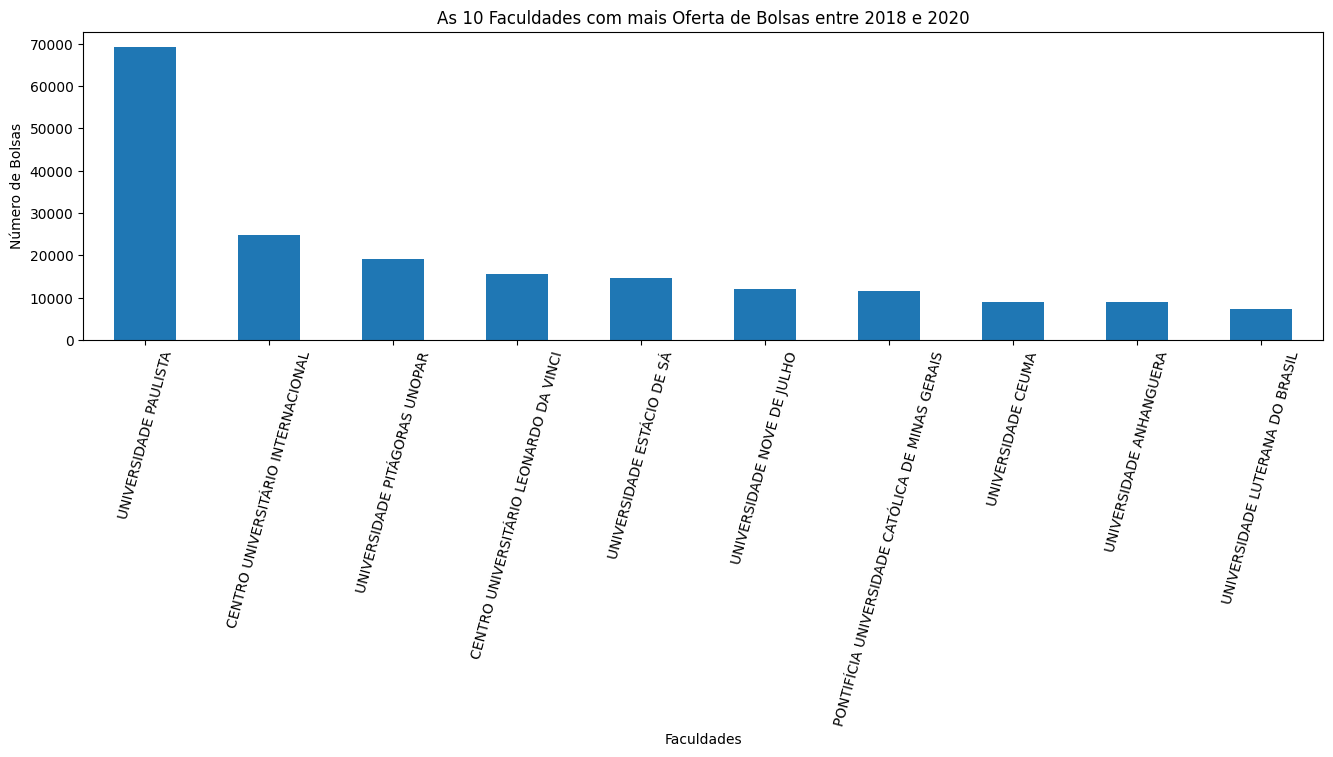

In [21]:
df_prouni_filtrado['NOME_IES'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("As 10 Faculdades com mais Oferta de Bolsas entre 2018 e 2020")
plt.xlabel("Faculdades")
plt.ylabel("Número de Bolsas")
plt.xticks(rotation=75)
plt.show()

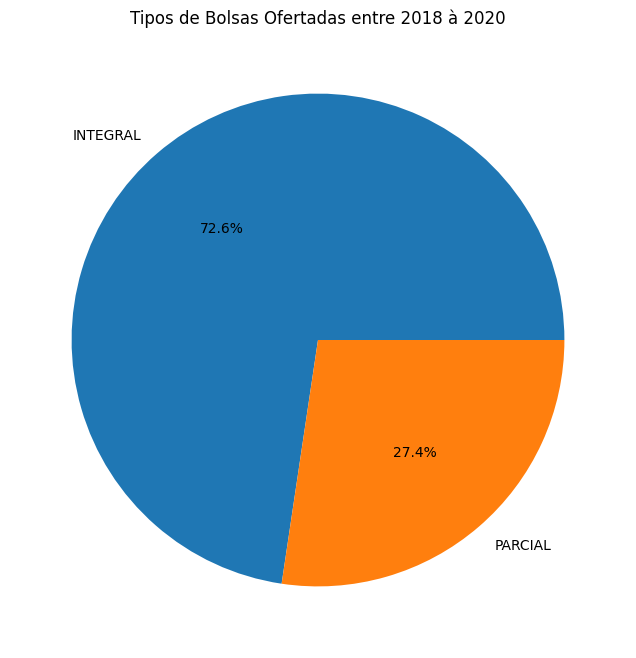

In [22]:
prouni_filtered = prouni[prouni['TIPO_BOLSA'] != 'Outro']
data = prouni_filtered['TIPO_BOLSA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Tipos de Bolsas Ofertadas entre 2018 à 2020")
plt.show()

In [23]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,Presencial,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,Nordeste,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,Presencial,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,Nordeste,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,Presencial,Psicologia,Vespertino,F,Parda,04/11/1998,N,Nordeste,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,Presencial,Serviço Social,Noturno,F,Parda,29/09/1999,N,Nordeste,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,Sul,RS,SAO FRANCISCO DE PAULA


In [24]:
prouni["MODALIDADE_ENSINO"].value_counts()

MODALIDADE_ENSINO
Presencial    342007
EAD           178405
PRESENCIAL    113005
Outro          15477
Name: count, dtype: int64

In [25]:
prouni['MODALIDADE_ENSINO'] = prouni['MODALIDADE_ENSINO'].replace({'Presencial': 'PRESENCIAL'})

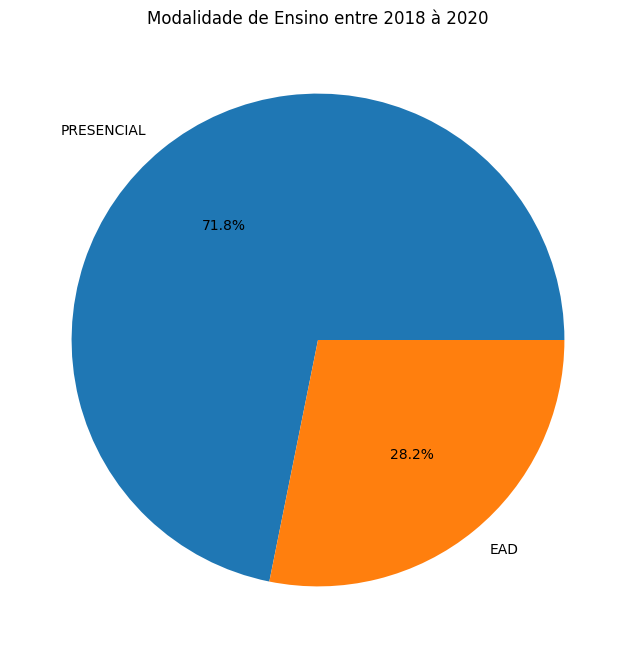

In [26]:
prouni_filtered = prouni[prouni['MODALIDADE_ENSINO'] != 'Outro']
data = prouni_filtered['MODALIDADE_ENSINO'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Modalidade de Ensino entre 2018 à 2020")
plt.show()

In [27]:
prouni["REGIAO_BENEFICIARIO"].value_counts()

REGIAO_BENEFICIARIO
Sudeste         208108
Nordeste        101708
Sul              77846
SUDESTE          71644
Centro-Oeste     41295
NORDESTE         39252
Norte            37630
SUL              26376
NORTE            16303
Outro            15477
CENTRO-OESTE     13255
Name: count, dtype: int64

In [28]:
prouni['REGIAO_BENEFICIARIO'] = prouni['REGIAO_BENEFICIARIO'].replace({'Sudeste': 'SUDESTE', 'Nordeste': 'NORDESTE', 'Sul': 'SUL',
                                                                      'Centro-Oeste': 'CENTRO-OESTE', 'Norte': 'NORTE'})

In [29]:
prouni["REGIAO_BENEFICIARIO"].value_counts()

REGIAO_BENEFICIARIO
SUDESTE         279752
NORDESTE        140960
SUL             104222
CENTRO-OESTE     54550
NORTE            53933
Outro            15477
Name: count, dtype: int64

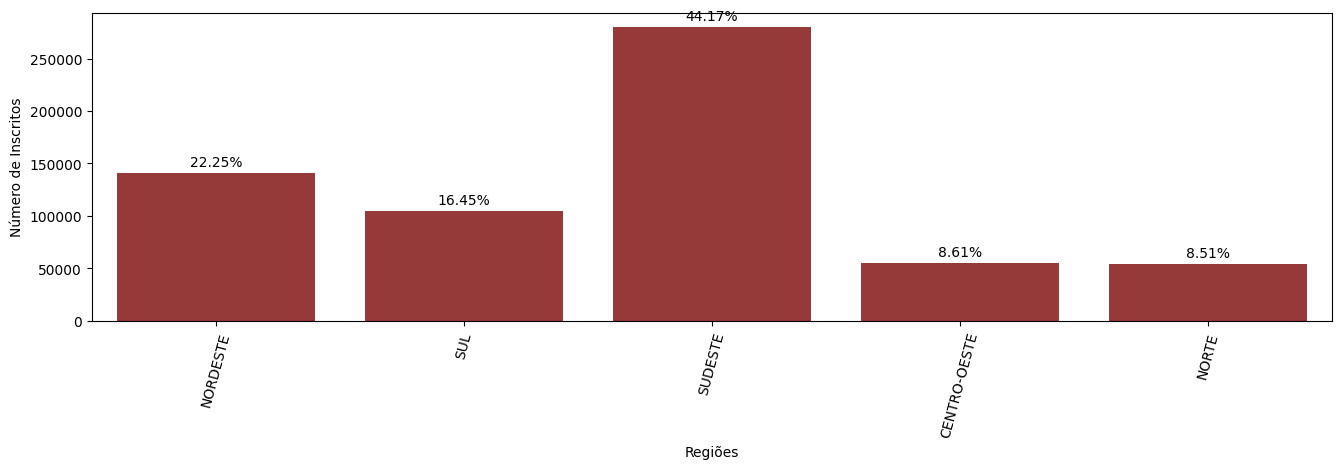

In [30]:
prouni_filtered = prouni[prouni['MODALIDADE_ENSINO'] != 'Outro']
plt.figure(figsize=(16, 4))
sns.countplot(x='REGIAO_BENEFICIARIO', data=prouni_filtered, color='brown')
plt.xlabel('Regiões')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=75)

# Obtém o total de inscritos
total_inscritos = len(prouni_filtered)

# Percorre cada barra do gráfico
for barra in plt.gca().patches:
    # Obtém a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em relação ao total
    porcentagem = altura / total_inscritos * 100

    # Ajusta a posição da anotação se a altura da barra for pequena
    if altura < 30:
        plt.gca().annotate(f'{porcentagem:.2f}%', 
                           xy=(barra.get_x() + barra.get_width() / 2, altura),
                           xytext=(0, 10),
                           textcoords="offset points",
                           ha='center',
                           va='bottom')
    else:
        plt.gca().annotate(f'{porcentagem:.2f}%', 
                           xy=(barra.get_x() + barra.get_width() / 2, altura),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center',
                           va='bottom')

plt.show()

In [31]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,NORDESTE,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,NORDESTE,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Psicologia,Vespertino,F,Parda,04/11/1998,N,NORDESTE,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Serviço Social,Noturno,F,Parda,29/09/1999,N,NORDESTE,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,SUL,RS,SAO FRANCISCO DE PAULA


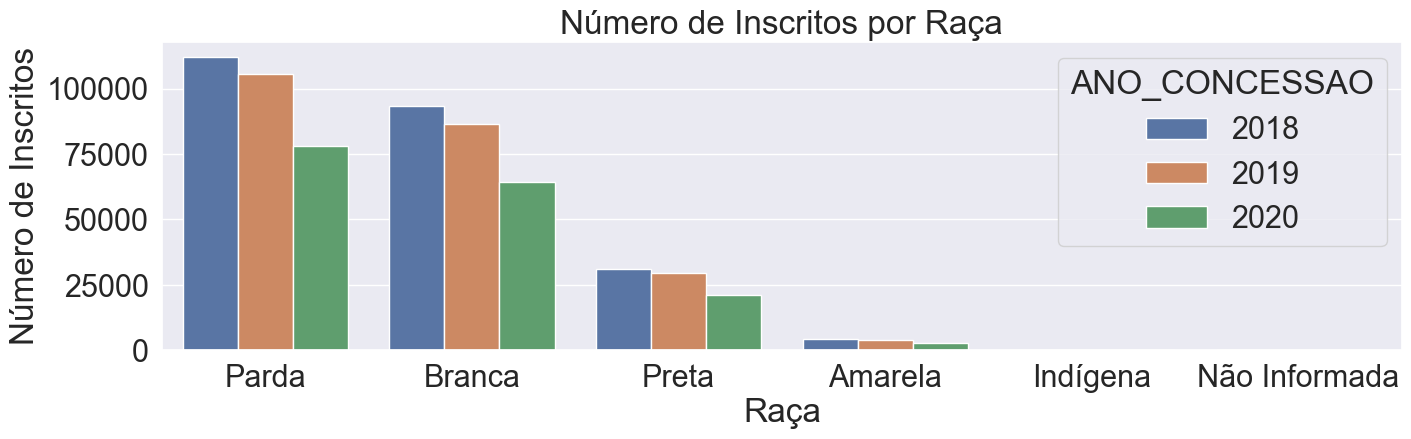

In [32]:
prouni_filtered = prouni[prouni['ANO_CONCESSAO'] != 'Outro']
prouni_filtered['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)
sns.set(font_scale=2)
plt.figure(figsize=(16, 4))
sns.countplot(x='RACA_BENEFICIARIO', hue='ANO_CONCESSAO', data=prouni_filtered, dodge=True)
plt.title("Número de Inscritos por Raça")
plt.xlabel('Raça')
plt.ylabel('Número de Inscritos')
plt.show()

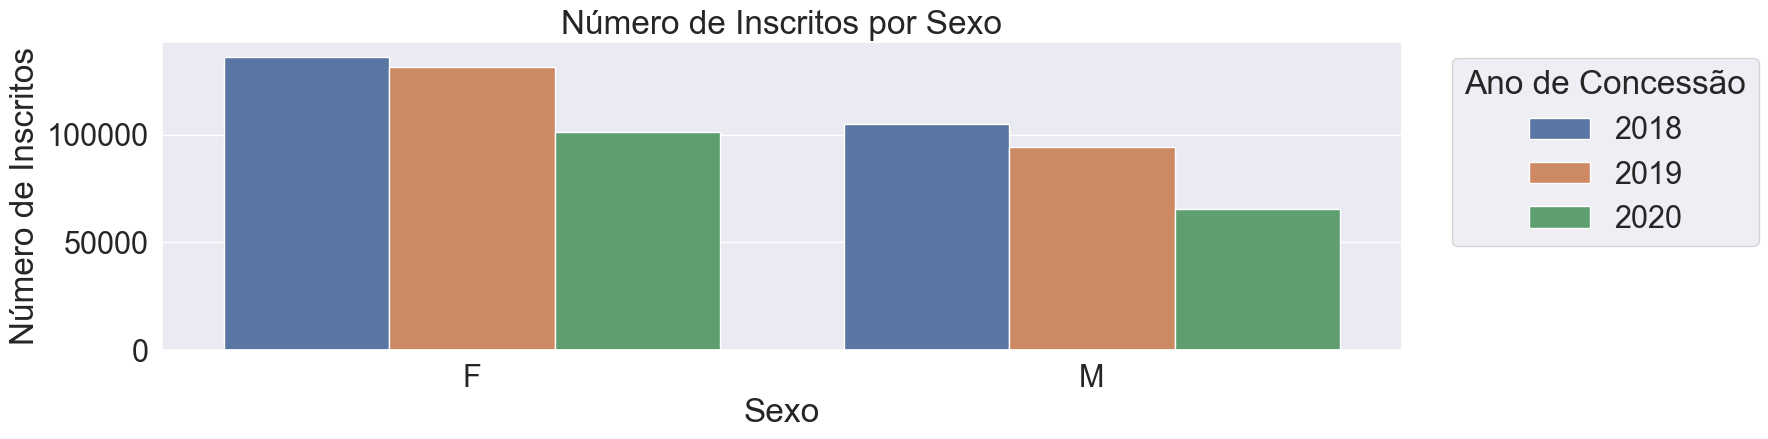

In [33]:
prouni_filtered['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)
sns.set(font_scale=2)
plt.figure(figsize=(16, 4))
ax = sns.countplot(x='SEXO_BENEFICIARIO', hue='ANO_CONCESSAO', data=prouni_filtered, dodge=True)
plt.title("Número de Inscritos por Sexo")
plt.xlabel('Sexo')
plt.ylabel('Número de Inscritos')
ax.legend(title='Ano de Concessão', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Com base nas informações a maioria das bolsas oferecidas pelo programa Prouni são bolsas integrais, representando 72,6% de todas as bolsas. Além disso, a maioria das bolsas é para cursos presenciais, representando 71,8% de todas as bolsas.

Em termos de distribuição regional, a região Sudeste tem o maior número de beneficiários de bolsas. Isso pode ser devido ao fato de que esta região também tem a maior população do Brasil.

Em relação à raça dos beneficiários das bolsas, a maioria é parda, seguida por brancos e negros. As mulheres também representam um número maior de beneficiárias de bolsas em comparação aos homens.

Essas observações podem ser devidas a uma variedade de fatores, como condições socioeconômicas, oportunidades educacionais e distribuição demográfica. Seria necessário realizar uma análise mais aprofundada para determinar as causas subjacentes dessas tendências. 😊

In [34]:
prouni.head()

,index,ANO_CONCESSAO,NOME_IES,TIPO_BOLSA,MODALIDADE_ENSINO,NOME_CURSO,NOME_TURNO_CURSO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,0,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Letras - Espanhol,Noturno,F,Parda,15/07/1980,N,NORDESTE,PE,RECIFE
1,1,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Letras - Português E Espanhol,Noturno,M,Branca,06/09/2000,N,NORDESTE,PE,PAULISTA
2,2,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Psicologia,Vespertino,F,Parda,04/11/1998,N,NORDESTE,PE,RECIFE
3,3,2018.0,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,INTEGRAL,PRESENCIAL,Serviço Social,Noturno,F,Parda,29/09/1999,N,NORDESTE,PE,RECIFE
4,4,2018.0,UNIVERSIDADE DE CAXIAS DO SUL,INTEGRAL,EAD,Administração,Curso a distância,F,Branca,30/04/2000,N,SUL,RS,SAO FRANCISCO DE PAULA


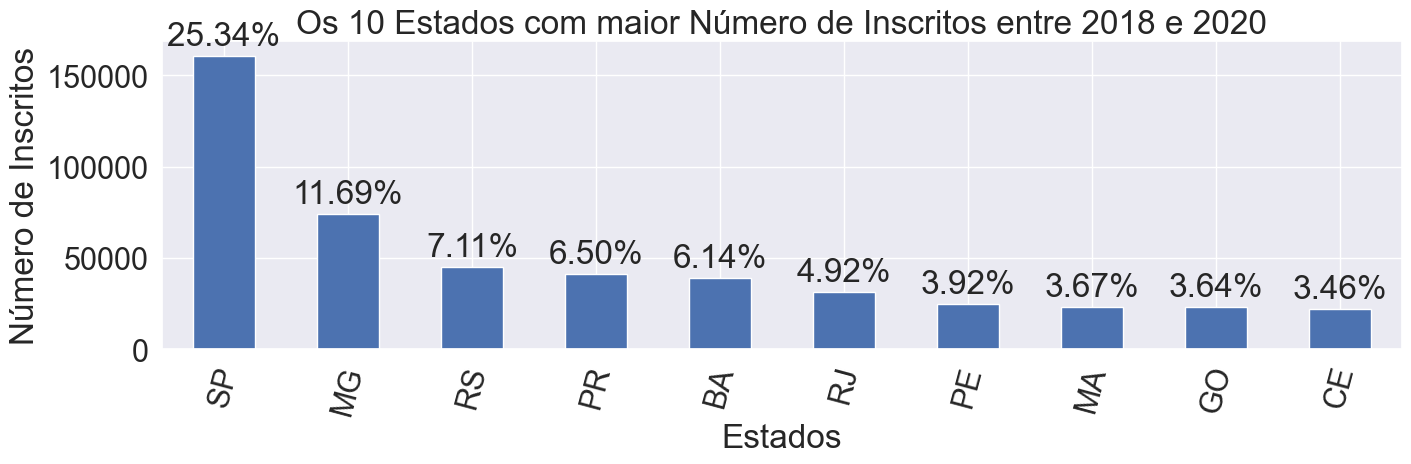

In [35]:
df_prouni_filtrado['UF_BENEFICIARIO'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("Os 10 Estados com maior Número de Inscritos entre 2018 e 2020")
plt.xlabel("Estados")
plt.ylabel("Número de Inscritos")
plt.xticks(rotation=75)

# Obtém o total de inscritos
total_inscritos = df_prouni_filtrado['UF_BENEFICIARIO'].value_counts().sum()

# Percorre cada barra do gráfico
for barra in plt.gca().patches:
    # Obtém a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em relação ao total
    porcentagem = altura / total_inscritos * 100

    # Adiciona a porcentagem acima de cada barra
    plt.gca().annotate(f'{porcentagem:.2f}%', 
                       xy=(barra.get_x() + barra.get_width() / 2, altura),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center',
                       va='bottom')

plt.show()

In [36]:
prouni['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts()

BENEFICIARIO_DEFICIENTE_FISICO
N        628933
Outro     15477
S          4484
Name: count, dtype: int64

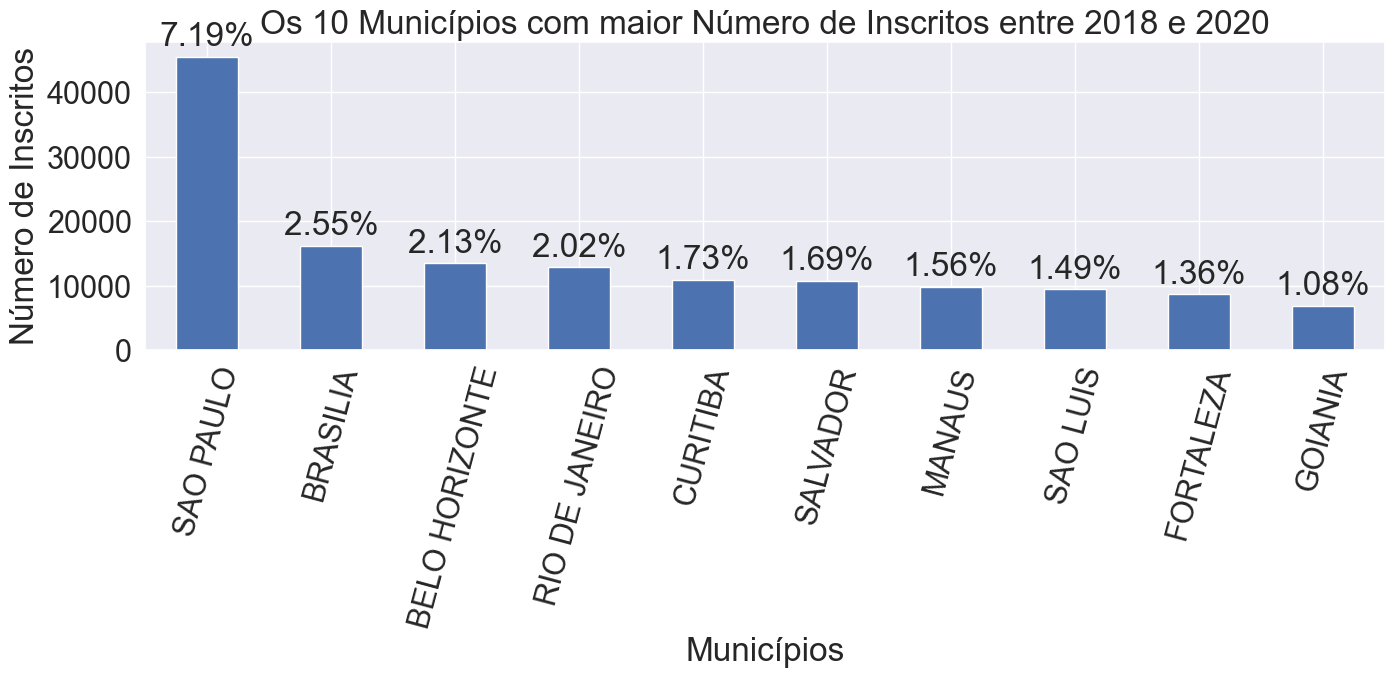

In [37]:
df_prouni_filtrado['MUNICIPIO_BENEFICIARIO'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("Os 10 Municípios com maior Número de Inscritos entre 2018 e 2020")
plt.xlabel("Municípios")
plt.ylabel("Número de Inscritos")
plt.xticks(rotation=75)

total_inscritos = df_prouni_filtrado['MUNICIPIO_BENEFICIARIO'].value_counts().sum()

for barra in plt.gca().patches:
    # Obtém a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em relação ao total
    porcentagem = altura / total_inscritos * 100

    plt.gca().annotate(f'{porcentagem:.2f}%', 
                       xy=(barra.get_x() + barra.get_width() / 2, altura),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center',
                       va='bottom')

plt.show()

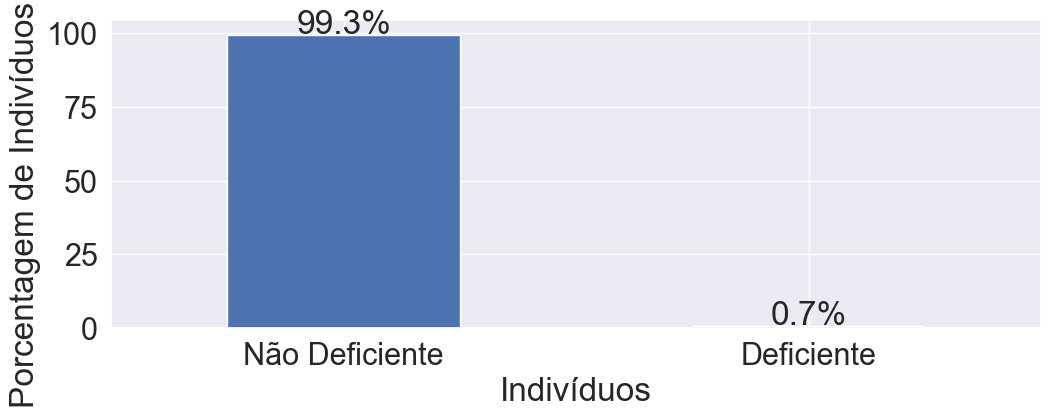

In [38]:
prouni_filtered = prouni[prouni['BENEFICIARIO_DEFICIENTE_FISICO'] != 'Outro']
data = prouni_filtered['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts(normalize=True) * 100
data.index = ['Não Deficiente', 'Deficiente']

plt.figure(figsize=(12, 4))
ax = data.plot(kind='bar')
plt.xlabel('Indivíduos')
plt.ylabel('Porcentagem de Indivíduos (%)')
plt.xticks(rotation=0)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height + 0.5, f'{data[i]:.1f}%', ha='center')

plt.show()

Com base nas informações apenas 0,7% dos beneficiários de bolsas são pessoas com deficiência. Isso sugere que pode haver barreiras ao acesso à educação para pessoas com deficiência.

É importante promover a inclusão e igualdade de oportunidades para pessoas com deficiência em todas as áreas da sociedade, incluindo a educação. Isso pode ser alcançado através de uma variedade de medidas, como fornecer infraestrutura e instalações acessíveis, oferecer serviços de apoio e acomodações e conscientizar sobre os direitos e necessidades das pessoas com deficiência.

Ao implementar essas medidas, podemos ajudar a garantir que as pessoas com deficiência tenham igualdade de acesso à educação e às oportunidades que ela proporciona. Isso pode beneficiar não apenas as pessoas com deficiência, mas também a sociedade como um todo, promovendo diversidade, inclusão e justiça social.

Ao analisar os dados referentes ao número de inscrições no Programa Universidade para Todos (ProUni) nos 10 municípios com maior quantidade de inscritos entre 2018 e 2020, observa-se que todos eles são capitais. Essa tendência pode ser justificada por diversos fatores:

1. Concentração populacional: As capitais geralmente apresentam uma densidade populacional maior do que outras cidades. Essa maior concentração de pessoas pode resultar em um número maior de estudantes que se enquadram nos critérios de elegibilidade do ProUni, como baixa renda.

2. Maior oferta de instituições de ensino superior: As capitais costumam abrigar uma quantidade significativa de instituições de ensino superior, incluindo universidades públicas e privadas. Essa maior oferta de instituições educacionais pode atrair um maior número de estudantes interessados em se candidatar ao ProUni nessas localidades.

3. Acesso a uma variedade de cursos e áreas de estudo: As capitais geralmente oferecem uma ampla gama de cursos e áreas de estudo em suas instituições de ensino superior. Isso pode atrair estudantes de diferentes áreas de interesse que desejam se candidatar ao ProUni em busca de oportunidades educacionais diversificadas.

4. Melhores condições socioeconômicas: Em muitos casos, as capitais tendem a apresentar melhores indicadores socioeconômicos em comparação com outras cidades do país. Isso pode refletir em uma maior proporção de estudantes elegíveis ao ProUni que atendem aos critérios de baixa renda exigidos pelo programa.

5. Consciência e divulgação: Devido à maior visibilidade das capitais, pode haver uma conscientização e divulgação mais intensa do ProUni nessas regiões. Isso pode resultar em um maior conhecimento do programa entre os estudantes, incentivando um maior número de inscrições.

É importante ressaltar que essas são apenas algumas possíveis justificativas para a concentração das inscrições do ProUni nas capitais. Outros fatores específicos de cada cidade e contexto local também podem influenciar essa tendência.

## Conlusão

Ao analisar os dados do Programa Universidade para Todos (ProUni), é possível observar que ainda há desafios a serem enfrentados para promover uma educação mais inclusiva no Brasil. Dentre as conclusões obtidas a partir dos dados, destaca-se o fato de que pessoas com deficiência representam apenas 0,7% dos inscritos no programa. Essa baixa representatividade pode ser justificada por diversos fatores:

1. Barreiras físicas e de acessibilidade: Infelizmente, muitas instituições de ensino ainda enfrentam desafios em termos de infraestrutura e acessibilidade para pessoas com deficiência. A falta de adaptações adequadas nas instalações e a ausência de recursos pedagógicos inclusivos podem dificultar o acesso e a participação desses estudantes no ensino superior.

2. Falta de divulgação e conscientização: A falta de divulgação eficiente sobre as oportunidades oferecidas pelo ProUni para pessoas com deficiência pode contribuir para a baixa representatividade desse grupo nos inscritos. A conscientização insuficiente sobre as políticas e recursos disponíveis para apoiar estudantes com deficiência pode resultar em uma menor procura por parte desses indivíduos.

3. Desigualdades socioeconômicas: Pessoas com deficiência frequentemente enfrentam desigualdades socioeconômicas, o que pode impactar seu acesso à educação superior. Questões como falta de recursos financeiros para arcar com as despesas complementares das bolsas parciais do ProUni e dificuldades no acesso a serviços de apoio e assistência podem ser obstáculos para a participação desses estudantes no programa.

Além disso, é importante ressaltar que o número de inscritos no ProUni vem diminuindo a cada ano. Essa tendência pode ser justificada por diversos fatores:

1. Condições socioeconômicas desfavoráveis: Oscilações na economia do país e períodos de recessão podem impactar negativamente o número de inscritos no programa. A falta de recursos financeiros e a incerteza econômica podem desencorajar muitos estudantes de baixa renda a se inscreverem no ProUni.

2. Mudanças nas regras e critérios do programa: Alterações nas regras e critérios de elegibilidade do ProUni podem influenciar a participação dos estudantes. Se houver redução nos benefícios oferecidos ou restrições nos critérios de elegibilidade, isso pode levar a uma diminuição no interesse e na inscrição no programa.

Quanto à menor quantidade de inscritos vindos do interior dos estados, pode-se considerar algumas justificativas:

1. Menor oferta de instituições de ensino superior: Muitas vezes, o interior dos estados possui uma menor oferta de instituições de ensino superior em comparação com as regiões metropolitanas e capitais. A falta de opções próximas pode dificultar o acesso e a participação dos estudantes do interior no ProUni.

2. Dificuldades logísticas: A distância e a falta de infraestrutura adequada de transporte podem ser obstáculos para que estudantes do interior dos estados se candidatem ao ProUni. A dificuldade em se deslocar para participar de processos seletivos ou para acompanhar o desenvolvimento do curso podem influenciar a decisão de não se inscreverem.

Essas são algumas possíveis justificativas para a baixa representatividade de pessoas com deficiência, a diminuição no número de inscritos ao longo dos anos e a menor quantidade de inscritos provenientes do interior dos estados no Programa Universidade para Todos (ProUni). Esses dados destacam a necessidade contínua de aprimorar as políticas educacionais e promover um ambiente mais inclusivo, visando garantir igualdade de oportunidades de acesso à educação superior para todos os estudantes, independentemente de sua deficiência, localização geográfica ou condições socioeconômicas.